# Contents

- [Setup](#Setup)
    - [Double-checking Noise Models](#Double-checking-Noise-Models)
- [9.1 Behaviour of Different Types of Noise](#9.1-Behaviour-of-Different-Types-of-Noise)
    - [Calculation for Figures 9.2 & 9.3](#Calculation-for-Figures-9.2-&-9.3)
    - [Figure 9.2](#Figure-9.2)
    - [Figure 9.3](#Figure-9.3)
- [9.2 Repetition of Sequence Length](#9.2-Repetition-of-Sequence-Length)
    - [Calculation for Figure 9.4](#Calculation-for-Figure-9.4)
    - [Figure 9.4](#Figure-9.4)
- [9.3 SPAM Errors](#9.3-SPAM-Errors)
    - [Calculation for Figure 9.5](#Calculation-for-Figure-9.5)
    - [Figure 9.4](#Figure-9.5)
- [9.4 Gate-dependent Noise](#9.4-Gate-dependent-Noise)
    - [Calculation for Figures 9.7 & 9.8](#Calculation-for-Figures-9.7-&-9.8)
    - [Calculation for Figure 9.6](#Calculation-for-Figure-9.6)
    - [Figure 9.6](#Figure-9.6)
    - [Figure 9.7](#Figure-9.7)
    - [Figure 9.8](#Figure-9.8)

# Setup

In [1]:
using Plots
gr(dpi=150,linewidth=1.5,size=(500,350),markerstrokecolor=:auto,palette=RGB.([0x4c599a, 0xe66c6c, 0x7bc572, 0xfda440, 0x55bad8, 0xe467a8, 0x6ba2d8, 0xc87fcd, 0x448b26, 0x565559]),
background_color_legend=nothing,foreground_color_legend=nothing)
include("lib/superoperators.jl");
include("lib/RB.jl");
include("lib/cliffordGates.jl");
include("lib/noiseModels.jl");

## Double-checking Noise Models

Noise models and the function ``infidelity(𝓐,𝓑)``${}= 1-\mathcal{F}(\mathcal{A,B})$ are defined in `noiseModels.jl`.
This plot is to show that the noise functions reflect the target infidelities.


E.g. when using `depolarise(...)` to generate the noise $\Lambda = \texttt{depolarise}(r_{\mathrm{target}})$,
it should be the case that $1-\mathcal{F}(\mathcal{I},\Lambda) = r_{\mathrm{target}}$.


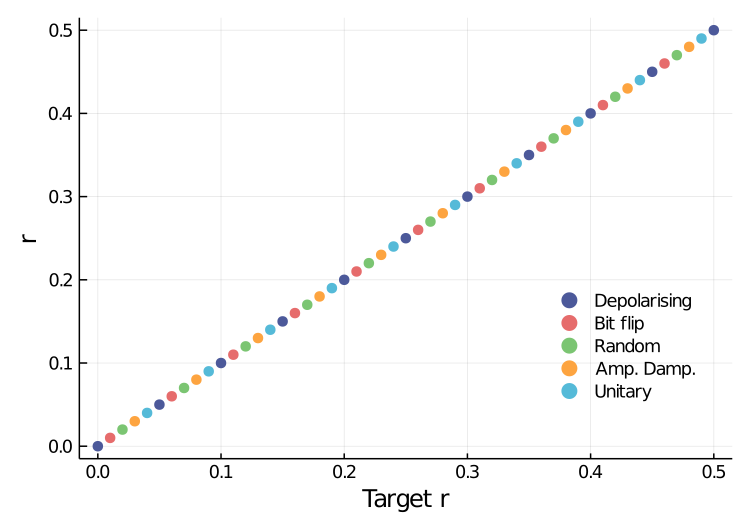

In [2]:
noises = [
    "Depolarising"      => depolarise,    # 0 ≤ r ≤ ⅔
    "Bit flip"          => bitflip,       # 0 ≤ r ≤ ⅔
    "Random"            => randomΛ,       # 0 ≤ r < ½
    "Amp. Damp."        => amplitudedamp, # 0 ≤ r ≤ ½
    "Unitary"           => random𝓤        # 0 ≤ r ≤ ⅔
]

r = 0:0.01:0.5

plt = plot(legend=:bottomright,xlabel="Target r",ylabel="r")
for k ∈ 1:length(noises)
    global plt
    name,noise = noises[k]
    rₖ = r[k:length(noises):length(r)]
    scatter!(plt,rₖ,[infidelity(I,noise(rₖᵢ)) for rₖᵢ in rₖ],label=name)
end
display(plt)

# 9.1 Behaviour of Different Types of Noise
## Calculation for Figures 9.2 & 9.3

In [3]:
ℂ = [rotate3D(∠C...) for ∠C in CliffordAngles]

M     = 1:5:100              # Array of sequences
K     = 500                  # Repetitions per sequence
r₀arr = [0.001, 0.01, 0.1]   # Target independent infidelities

N   = length(noises)
Nᵣ  = length(r₀arr)
F   = zeros(Nᵣ,N,length(M))
σF  = zeros(Nᵣ,N,length(M))
p   = zeros(Nᵣ,N,3)
σp  = zeros(Nᵣ,N,3)
p̄   = zeros(Nᵣ,N,3)
r̄   = zeros(Nᵣ,N)
σr̄  = zeros(Nᵣ,N)

for nᵣ ∈ 1:length(r₀arr)
    r₀  = r₀arr[nᵣ]      # Target independent infidelity (number or range)
    for n ∈ 1:N
        𝕔 = addnoise(ℂ,r₀,genΛ=noises[n][2])
        p̄ₙ,Āₙ,B̄ₙ,Δ = eigenRB(ℂ,𝕔)
        p̄[nᵣ,n,:] = [p̄ₙ,Āₙ,B̄ₙ]
        @time F[nᵣ,n,:],σF[nᵣ,n,:],r̄[nᵣ,n],σr̄[nᵣ,n] = standardRB(ℂ,𝕔,M,K)
        p[nᵣ,n,:],σp[nᵣ,n,:] = fitRB(M,F[nᵣ,n,:],σF[nᵣ,n,:])
    end
end
println("Calculation finished.")

  2.151073 seconds (4.41 M allocations: 353.145 MiB, 6.20% gc time)
  0.549126 seconds (1.54 M allocations: 214.344 MiB, 21.23% gc time)
  0.564621 seconds (1.54 M allocations: 214.344 MiB, 17.54% gc time)
  0.515168 seconds (1.54 M allocations: 214.344 MiB, 15.68% gc time)
  0.408897 seconds (1.54 M allocations: 214.344 MiB, 14.12% gc time)
  0.487353 seconds (1.54 M allocations: 214.344 MiB, 13.40% gc time)
  0.340144 seconds (1.54 M allocations: 214.344 MiB, 14.84% gc time)
  0.603367 seconds (1.54 M allocations: 214.344 MiB, 14.36% gc time)
  0.440234 seconds (1.54 M allocations: 214.344 MiB, 14.30% gc time)
  0.440757 seconds (1.54 M allocations: 214.344 MiB, 20.03% gc time)
  0.341201 seconds (1.54 M allocations: 214.344 MiB, 15.07% gc time)
  0.337202 seconds (1.54 M allocations: 214.344 MiB, 16.58% gc time)
  0.351821 seconds (1.54 M allocations: 214.344 MiB, 17.53% gc time)
  0.397069 seconds (1.54 M allocations: 214.344 MiB, 13.40% gc time)
  0.387929 seconds (1.54 M allocati

## Figure 9.2
RB experiments for target infidelity $r = 10^{-2}$. Because of the twirling
process, all cases exhibit the same decay pattern regardless of the actual behaviour of the noise.

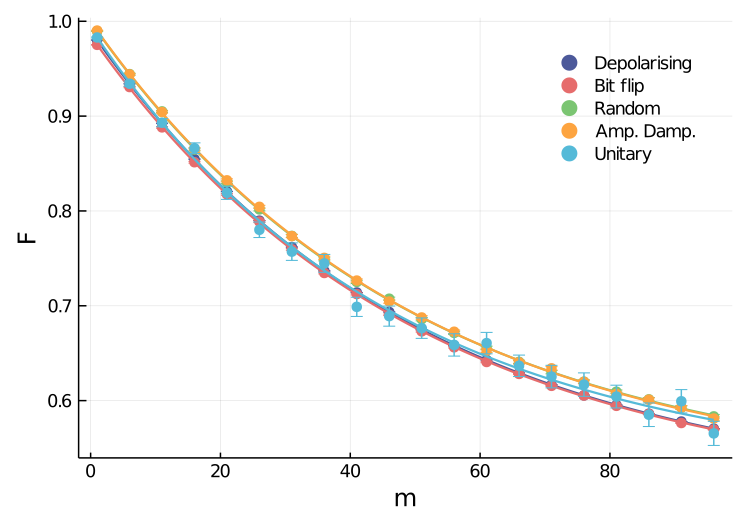

In [4]:
nᵣ = 2
plt = plot(xlabel="m",ylabel="F")
for n ∈ 1:N
    global plt
    scatter!(plt,M,F[nᵣ,n,:],yerr=σF[nᵣ,n,:],label=noises[n][1],colour=n)
    plot!(plt,m->modelF(m,p[nᵣ,n,:]),M[1]:.1:M[end],label=false,colour=n)
end
display(plt)

## Figure 9.3
Predicted values of $r$ by fitting (filled points), $r$ obtained via the eigenequation (unfilled points), and the actual average infidelity of the gates (solid line).

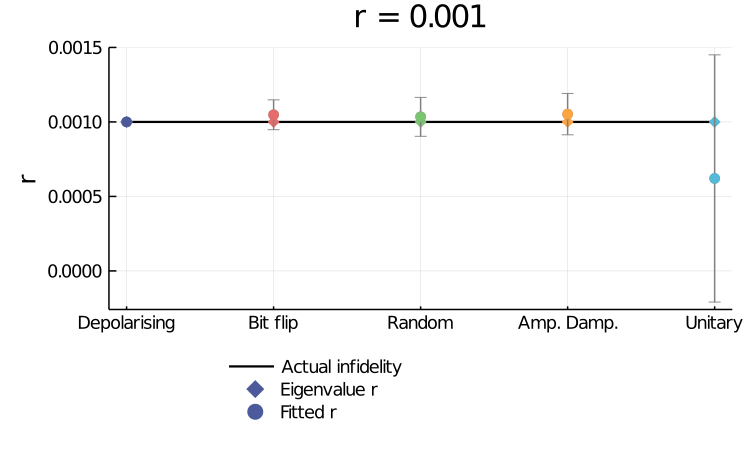

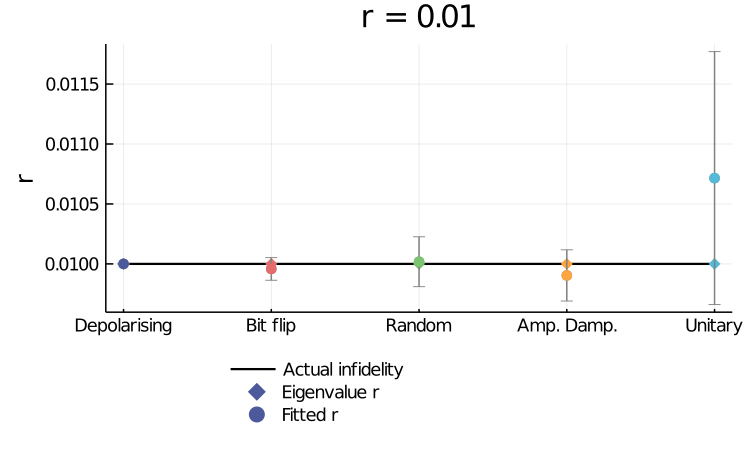

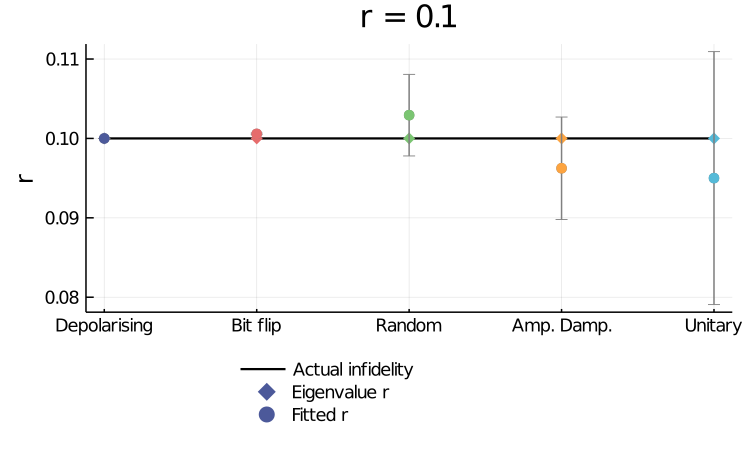

In [5]:
for nᵣ in 1:length(r₀arr)
    plot(ylabel="r",size=(500, 300),legend=:outerbottom)
    plot!(r̄[nᵣ,:],label="Actual infidelity",colour="black")
    scatter!((1 .- p̄[nᵣ,:,1])/2, label="Eigenvalue r", colour=1:N, markershape=:diamond)
    scatter!((1 .- p[nᵣ,:,1])/2, yerr=σp[nᵣ,:,1]/2, label=false, colour="grey")
    scatter!((1 .- p[nᵣ,:,1])/2, label="Fitted r", colour=1:N)
    xticks!(1:N, [noise[1] for noise in noises])
    display(title!("r = $(r₀arr[nᵣ])"))
end

# 9.2 Repetition of Sequence Length
## Calculation for Figure 9.4

In [6]:
Kₖ = 2 .^ (3:10)

nᵣ = 3
n  = 5

Nₖ  = length(Kₖ)
Fₖ  = zeros(Nₖ,length(M))
σFₖ = zeros(Nₖ,length(M))
r̄ₖ  = zeros(Nₖ)
σr̄ₖ = zeros(Nₖ)
pₖ  = zeros(Nₖ,3)
σpₖ = zeros(Nₖ,3)
p̄ₖ  = zeros(Nₖ,3)

𝕔 = addnoise(ℂ,r₀arr[nᵣ],genΛ=noises[n][2])
for k in 1:length(Kₖ)
    @time Fₖ[k,:],σFₖ[k,:],r̄ₖ[k],σr̄ₖ[k] = standardRB(ℂ,𝕔,M,Kₖ[k])
    pₖ[k,:],σpₖ[k,:] = fitRB(M,Fₖ[k,:],σFₖ[k,:])
    p₀,A₀,B₀ = eigenRB(ℂ,𝕔)
    p̄ₖ[k,:] = [p₀,A₀,B₀]
end


  0.083940 seconds (54.89 k allocations: 5.006 MiB, 43.84% gc time)
  0.007744 seconds (49.19 k allocations: 7.043 MiB)
  0.015411 seconds (98.31 k allocations: 14.082 MiB)
  0.030087 seconds (196.55 k allocations: 28.160 MiB)
  0.119323 seconds (393.03 k allocations: 56.316 MiB, 31.78% gc time)
  0.188534 seconds (786.00 k allocations: 110.626 MiB, 16.55% gc time)
  0.473744 seconds (1.57 M allocations: 219.247 MiB, 12.26% gc time)
  1.121727 seconds (3.14 M allocations: 436.489 MiB, 41.56% gc time)


## Figure 9.4
$r$ against $K$ for unitary noise. The error bars of $r$ converge to the actual average gate
infidelity as $K$ increases.

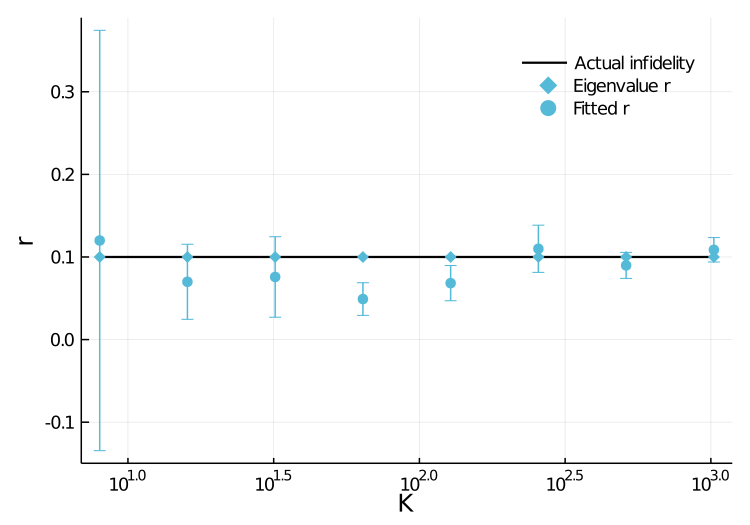

In [7]:
plot(xscale=:log10,xlabel="K",ylabel="r")
plot!(Kₖ,r̄ₖ,label="Actual infidelity",colour="black")
scatter!(Kₖ,(1 .- p̄ₖ[:,1])/2,label="Eigenvalue r",colour=n,shape=:diamond)
scatter!(Kₖ,(1 .- pₖ[:,1])/2, yerror=σpₖ[:,1]/2,label="Fitted r",colour=n)

# 9.3 SPAM Errors
## Calculation for Figure 9.5

In [8]:
rₛ = 10 .^ (-5.5:.5:-.5)
nᵣ = 2

n = [0,0,1]
q = [0,0,1]

Nₛ  = length(rₛ)
Fₛ  = zeros(Nₛ,length(M))
σFₛ = zeros(Nₛ,length(M))
pₛ  = zeros(Nₛ,3)
σpₛ = zeros(Nₛ,3)
p̄ₛ  = zeros(Nₛ,3)
r̄ₛ  = zeros(Nₛ)
σr̄ₛ = zeros(Nₛ)

for nₛ in 1:length(rₛ)
    λ,Λ = randomΛ(rₛ[nₛ])
    𝒏 = λ + Λ*n
    λ,Λ = randomΛ(rₛ[nₛ])
    𝒒 = λ + Λ*q
    𝕔 = addnoise(ℂ,r₀arr[nᵣ])
    @time Fₛ[nₛ,:],σFₛ[nₛ,:],r̄ₛ[nₛ],σr̄ₛ[nₛ] = standardRB(ℂ,𝕔,M,K,n=𝒏,q=𝒒)
    pₛ[nₛ,:],σpₛ[nₛ,:] = fitRB(M,Fₛ[nₛ,:],σFₛ[nₛ,:])
    p₀,A₀,B₀ = eigenRB(ℂ,𝕔)
    p̄ₛ[nₛ,:] = [p₀,A₀,B₀]
end
println("Calculation finished.")

  0.585745 seconds (1.89 M allocations: 231.208 MiB, 13.21% gc time)
  0.345747 seconds (1.53 M allocations: 213.275 MiB, 14.99% gc time)
  0.405353 seconds (1.53 M allocations: 213.275 MiB, 12.16% gc time)
  0.325611 seconds (1.53 M allocations: 213.275 MiB, 15.54% gc time)
  0.295889 seconds (1.53 M allocations: 213.275 MiB, 10.11% gc time)
  0.370040 seconds (1.53 M allocations: 213.275 MiB, 20.87% gc time)
  0.499985 seconds (1.53 M allocations: 213.275 MiB, 11.40% gc time)
  0.279056 seconds (1.53 M allocations: 213.275 MiB, 18.27% gc time)
  0.276649 seconds (1.53 M allocations: 213.275 MiB, 12.14% gc time)
  0.315179 seconds (1.53 M allocations: 213.275 MiB, 13.05% gc time)
  0.281458 seconds (1.53 M allocations: 213.275 MiB, 12.81% gc time)
Calculation finished.


## Figure 9.5
A series of RB experiments with increasing SPAM errors. The noise of the
gate set, with target $r = 10^{-2}$, was unchanged for all runs. SPAM errors do not affect
the reported RB number.

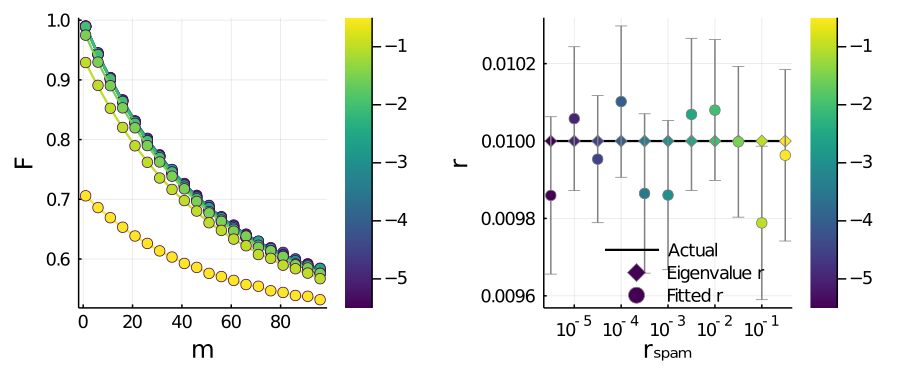

In [9]:
nᵣ = 2
plt = plot(xlabel="m",ylabel="F")
for nₛ ∈ 1:Nₛ
    global plt
    plot!(plt,m->modelF(m,pₛ[nₛ,:]),M[1]:.1:M[end],line_z=log10.(rₛ[nₛ]),label=false,linecolour=:viridis)
    scatter!(plt,M,Fₛ[nₛ,:],marker_z=log10.(rₛ[nₛ]),colour=:viridis,label=false)
end


plt2 = plot(xscale=:log10,xlabel="rₛₚₐₘ",ylabel="r")
plot!(plt2,rₛ,r̄ₛ,c="black",label="Actual")
scatter!(plt2,rₛ,(1 .- p̄ₛ[:,1])/2,marker_z=log10.(rₛ),label="Eigenvalue r",colour=:viridis,markerstrokecolour="grey",markershape=:diamond)
scatter!(plt2,rₛ,(1 .- pₛ[:,1])/2,yerr=σpₛ[:,1]/2,label=false,colour="grey")
scatter!(plt2,rₛ,(1 .- pₛ[:,1])/2,marker_z=log10.(rₛ),legend=(.5,.2),label="Fitted r",colour=:viridis,markerstrokecolour="grey")

plot(plt,plt2,size=(600,250))

# 9.4 Gate-dependent Noise
## Calculation for Figures 9.7 & 9.8

In [10]:
nᵣ    = 1
r₁    = (0.9,1.1) .* r₀arr[nᵣ]
darr  = [0.01,0.1,1.0]

Nₑ  = length(darr)
Fₑ  = zeros(Nₑ,N,length(M))
σFₑ = zeros(Nₑ,N,length(M))
pₑ  = zeros(Nₑ,N,3)
σpₑ = zeros(Nₑ,N,3)
p̄ₑ  = zeros(Nₑ,N,3)
r̄ₑ  = zeros(Nₑ,N)
σr̄ₑ = zeros(Nₑ,N)
ϵₑ  = zeros(Nₑ,N,length(M))
σϵₑ = zeros(Nₑ,N,length(M))

for nₑ ∈ 1:Nₑ
    r₀  = r₀arr[nᵣ]      # Target independent infidelity (number or range)
    for n ∈ 1:N
        𝕔 = addnoise(ℂ,r₀arr[nᵣ],darr[nₑ],r₁,genΛ=noises[n][2])
        p̄ₙ,Āₙ,B̄ₙ,Δ = eigenRB(ℂ,𝕔)
        p̄ₑ[nₑ,n,:] = [p̄ₙ,Āₙ,B̄ₙ]
        @time Fₑ[nₑ,n,:],σFₑ[nₑ,n,:],r̄ₑ[nₑ,n],σr̄ₑ[nₑ,n],_,_,ϵₑ[nₑ,n,:],σϵₑ[nₑ,n,:] = standardRB(ℂ,𝕔,M,K,Δ=Δ)
        pₑ[nₑ,n,:],σpₑ[nₑ,n,:] = fitRB(M,Fₑ[nₑ,n,:],σFₑ[nₑ,n,:])
    end
end
println("Calculation finished.")

  1.081980 seconds (2.72 M allocations: 300.938 MiB, 10.17% gc time)
  1.138107 seconds (2.38 M allocations: 283.622 MiB, 17.11% gc time)
  1.067936 seconds (2.38 M allocations: 283.622 MiB, 6.80% gc time)
  0.726606 seconds (2.38 M allocations: 283.622 MiB, 12.24% gc time)
  0.652221 seconds (2.38 M allocations: 283.622 MiB, 22.85% gc time)
  0.841730 seconds (2.38 M allocations: 283.622 MiB, 34.11% gc time)
  0.586768 seconds (2.38 M allocations: 279.622 MiB, 10.63% gc time)
  0.508690 seconds (2.38 M allocations: 283.622 MiB, 12.87% gc time)
  0.501755 seconds (2.38 M allocations: 279.622 MiB, 12.70% gc time)
  0.539434 seconds (2.38 M allocations: 283.622 MiB, 12.04% gc time)
  0.541677 seconds (2.38 M allocations: 283.622 MiB, 7.43% gc time)
  0.665169 seconds (2.38 M allocations: 283.622 MiB, 10.13% gc time)
  0.574579 seconds (2.38 M allocations: 283.622 MiB, 19.31% gc time)
  0.649597 seconds (2.38 M allocations: 283.622 MiB, 36.82% gc time)
  0.649835 seconds (2.38 M allocatio

## Calculation for Figure 9.6

In [11]:
n  = 5
nᵣ = 1
nₑ = Nₑ

Fₖₑ  = zeros(Nₖ,length(M))
σFₖₑ = zeros(Nₖ,length(M))
r̄ₖₑ  = zeros(Nₖ)
σr̄ₖₑ = zeros(Nₖ)
pₖₑ  = zeros(Nₖ,3)
σpₖₑ = zeros(Nₖ,3)
p̄ₖₑ  = zeros(Nₖ,3)

𝕔 = addnoise(ℂ,r₀arr[nᵣ],darr[nₑ],r₁,genΛ=noises[n][2])
for k in 1:length(Kₖ)
    @time Fₖₑ[k,:],σFₖₑ[k,:],r̄ₖₑ[k],σr̄ₖₑ[k] = standardRB(ℂ,𝕔,M,Kₖ[k])
    pₖₑ[k,:],σpₖₑ[k,:] = fitRB(M,Fₖₑ[k,:],σFₖₑ[k,:])
    p₀,A₀,B₀ = eigenRB(ℂ,𝕔)
    p̄ₖₑ[k,:] = [p₀,A₀,B₀]
end
println("Calculation finished.")

  0.004086 seconds (24.62 k allocations: 3.523 MiB)
  0.007031 seconds (49.19 k allocations: 7.043 MiB)
  0.014096 seconds (98.31 k allocations: 14.082 MiB)
  0.060419 seconds (196.55 k allocations: 28.160 MiB, 22.98% gc time)
  0.086581 seconds (393.03 k allocations: 56.316 MiB, 11.75% gc time)
  0.187867 seconds (786.00 k allocations: 110.626 MiB, 13.75% gc time)
  0.310961 seconds (1.57 M allocations: 219.247 MiB, 11.77% gc time)
  0.724110 seconds (3.14 M allocations: 428.489 MiB, 11.55% gc time)
Calculation finished.


## Figure 9.6
Convergence of $r$ with $K$ for
gate-dependent unitary noise.

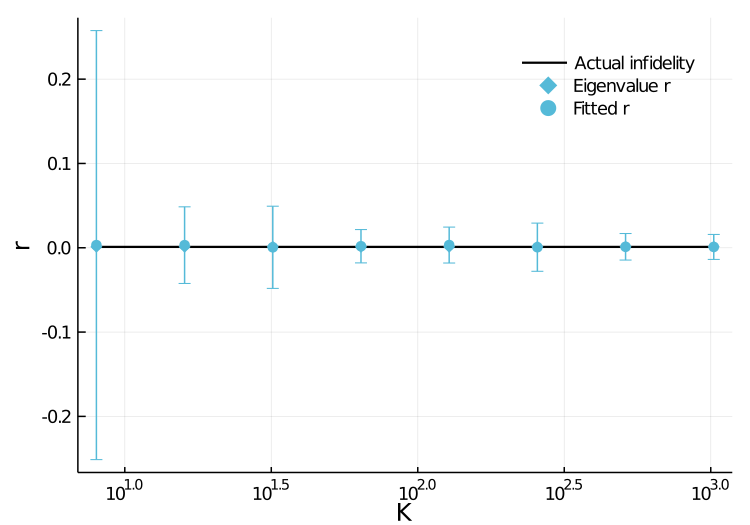

In [12]:
plot(xscale=:log10,xlabel="K",ylabel="r")
plot!(Kₖ,r̄ₖₑ,label="Actual infidelity",colour="black")
plot!(Kₖ,(r̄ₖₑ+σr̄ₖₑ),label=false,colour="black",linestyle=:dash)
plot!(Kₖ,(r̄ₖₑ-σr̄ₖₑ),label=false,colour="black",linestyle=:dash)
scatter!(Kₖ,(1 .- p̄ₖₑ[:,1])/2,label="Eigenvalue r",colour=n,shape=:diamond)
scatter!(Kₖ,(1 .- pₖₑ[:,1])/2, yerror=σpₖ[:,1]/2,label="Fitted r",colour=n)

## Figure 9.7
The dotted lines mark one
standard deviation of the average gate
infidelity. For 1% (top), 10% (middle),
and 100% (bottom) gate-dependent noise
channels, the RB number still returns
the average gate infidelity.

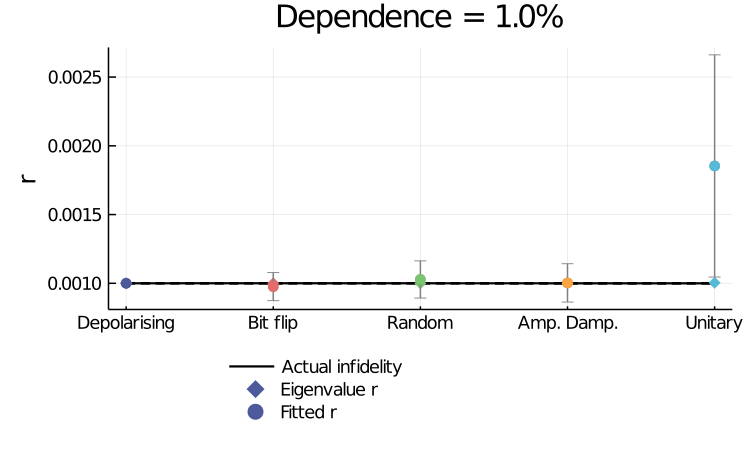

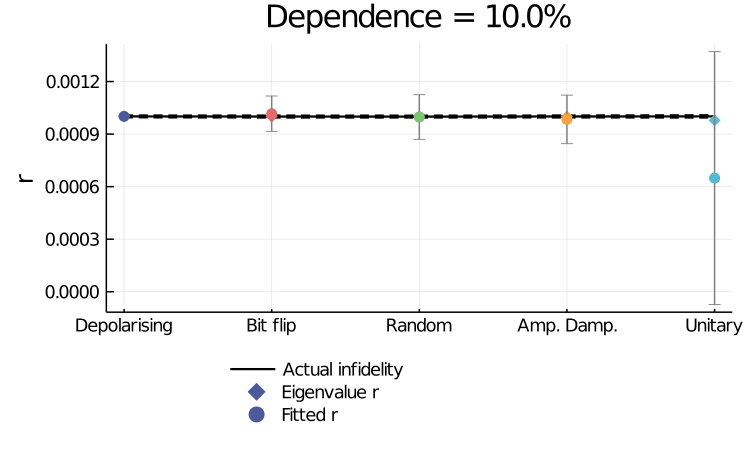

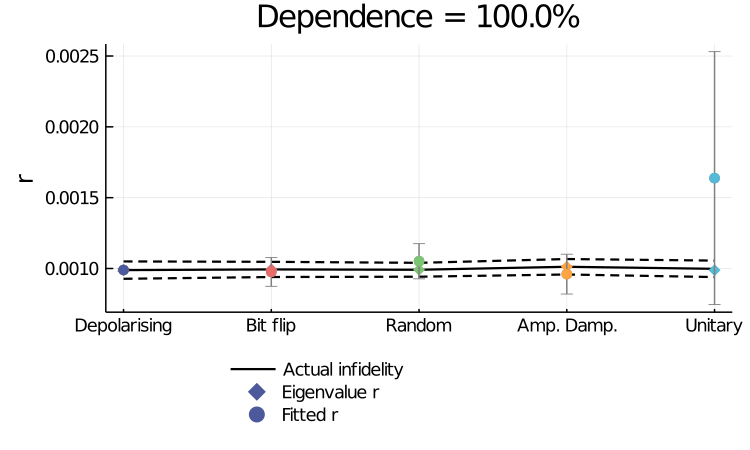

In [13]:
for nₑ ∈ 1:Nₑ
    plot(ylabel="r",size=(500, 300),legend=:outerbottom)
    plot!(r̄ₑ[nₑ,:],label="Actual infidelity",colour="black")
    plot!((r̄ₑ+σr̄ₑ)[nₑ,:],label=false,colour="black",linestyle=:dash)
    plot!((r̄ₑ-σr̄ₑ)[nₑ,:],label=false,colour="black",linestyle=:dash)
    scatter!((1 .- p̄ₑ[nₑ,:,1])/2, label="Eigenvalue r", colour=1:N, markershape=:diamond)
    scatter!((1 .- pₑ[nₑ,:,1])/2, yerr=σpₑ[nₑ,:,1]/2, label=false, colour="grey")
    scatter!((1 .- pₑ[nₑ,:,1])/2, label="Fitted r", colour=1:N)
    xticks!(1:N, [noise[1] for noise in noises])
    display(title!("Dependence = $(darr[nₑ]*100)%"))
end

## Figure 9.8
The correction term vanishes quickly for all noise channels,
even in this case where the noise is completely gate-dependent.

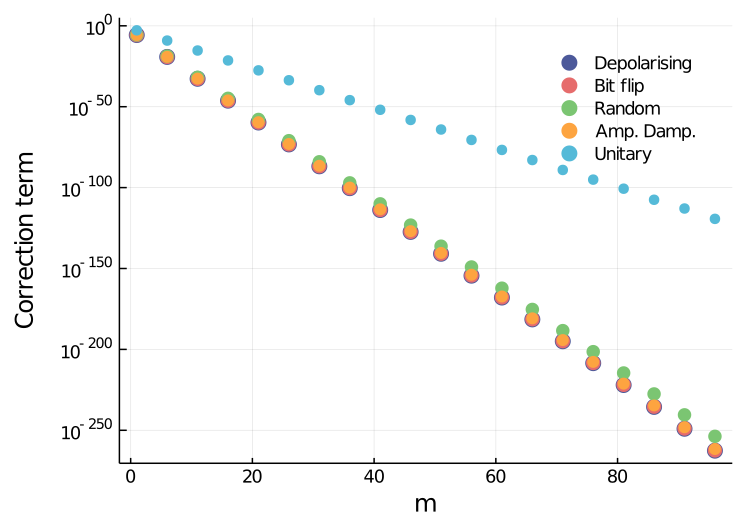

In [14]:
nₑ = Nₑ
plt = plot(xlabel="m",ylabel="Correction term",yscale=:log10)
for n ∈ 1:N
    global plt
    scatter!(plt,M,ϵₑ[nₑ,n,:],label=noises[n][1],colour=n,markersize=4+(N-n)/2)
end
display(plt)